# Release Highlights for scikit-learn 0.24

## Successive Halving estimators for tuning hyper-parameters

In [1]:
import numpy as np
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rng = np.random.RandomState(0)

X, y = make_classification(n_samples=700, random_state=rng)

clf = RandomForestClassifier(n_estimators=10, random_state=rng)

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}

rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)
rsh.fit(X, y)
rsh.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 10}

## New SequentialFeatureSelector transformer

In [2]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True, as_frame=True)
feature_names = X.columns
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)
sfs.fit(X, y)
print(
    "Feature selected by forward sequential selection: "
    f"{feature_names[sfs.get_support()].tolist()}"
)

Feature selected by forward sequential selection: ['sepal length (cm)', 'petal width (cm)']


## New PolynomialCountSketch kernel approximation function

In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import LogisticRegression

X, y = fetch_covtype(return_X_y=True)
pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialCountSketch(degree=2, n_components=300),
    LogisticRegression(max_iter=1000),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=5000, test_size=10000, random_state=42
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.7366

### 비교를 위한 코드

In [4]:
linear_baseline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))
linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.7137

## Individual Conditional Expectation plot

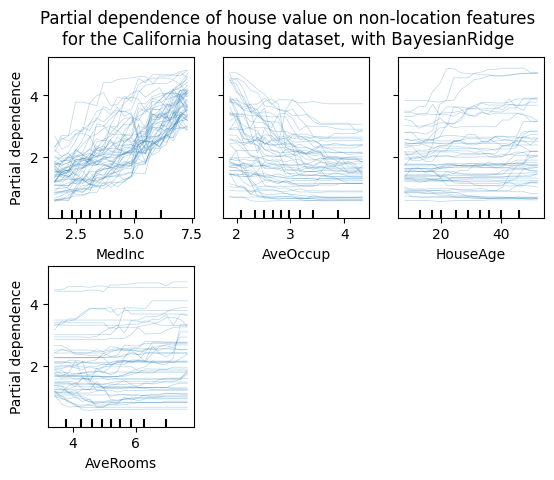

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
features = ["MedInc", "AveOccup", "HouseAge", "AveRooms"]
est = RandomForestRegressor(n_estimators=10)
est.fit(X, y)

# plot_partial_dependence은 버전 1.2에서 제거되고 1.2부터는 PartialDependenceDisplay를 사용해야 한다.
# disp = plot_partial_dependece()
display = PartialDependenceDisplay.from_estimator(
    est,
    X,
    features,
    kind="individual",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0
)
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with BayesianRidge"
)
display.figure_.subplots_adjust(hspace=0.3)

## New Poisson splitting criterion for DecisionTreeRegressor

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
# X[:, 5]와 상관관계가 있는 양의 정수 타겟과 많은 0
y = rng.poisson(lam=np.exp(X[:, 5]) / 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
regressor = DecisionTreeRegressor(criterion="poisson", random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', random_state=0)